# Data Visualisation - Lab 3 - Different types of Visualisations

---

**Authors: Claire Rocks, Richard Kirk and Saif Anwar**

---

Welcome to the third lab for Data Visualisation.

In this lab we are going to introduce a number of the chart types available through Seaborn and Matplotlib for Data Visualisation.  We'll take you through some examples and provide some tasks for you to work through at the end.

Choosing the most appropriate visualisation technique depends on a number of things, including:
  1. The nature of the features in the dataset
  2. The size of the dataset
  3. The density of datapoints in the chosen feature space
  4. The context of the visualisation

Belokar et al (2020) in Interactive Data Visualization with Python - Second Edition classify visualisations into two categories:
  1. Plots which represent global patterns e.g. histograms, scatterplots, hexbins, contour plots, line plots and heat maps
  2. Plots which represent the summary statistics of a dataset e.g. box plots and violin plots

For most datasets, the the best visualisations will likely emerge from trying out different kinds of plots. The visualisation you choose also depends on what you want to show. Do you want to show a relationship/link between two or more variables? Do you want to show the differences or similarities? Is the data geographical in nature? Are you looking to track changes over time?

## Setup for the lab

Let's start with installing and importing the required libraries. In this lab, we will be using the following libraries:
  * ```numpy``` - allows for advanced maths functions
  * ```pandas``` - allows for efficient data storage and manipulation
  * ```seaborn``` - allows for basic graph drawing
  * ```matplotlib``` - allows for greater plot manipulation
  * ```scipy``` - allows for scientific functions and algorithms to be utilised

In [1]:
# %pip install pandas seaborn matplotlib scipy numpy

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## MPG Dataset Graphs

With petrol prices increasing and climate change getting worse and worse, the miles per gallon (MPG) of a vehicle is becoming more of a concern for people buying new cars. Therefore, lets see if there is a correlation between the MPG and different factors. **Seaborn** contains a dataset that has this information...

In [2]:
## Load in the MPG dataset
mpg_df=sns.load_dataset("mpg")
mpg_df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

### Scatter plot

Back in Lab 1, we looked at scatter plots in the context of plotting a time series, but did not go into detail on what a scatter plot actually is. A scatter plot is a type of data display that shows the relationship between two numerical variables. As such, we can represent the weight of the vehicles compared to its MPG. We would expect that a heavier the vehicle would have a lower MPG.

See https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn-scatterplot

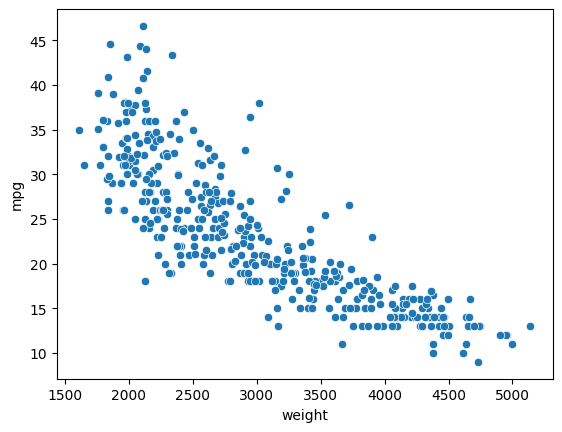

In [3]:
## Generate the scatter plot
ax = sns.scatterplot(data=mpg_df, x="weight", y="mpg")

From the graph above, we can see that the graph shows a decline in mpg with an increase in weight; as we expected! This is a useful insight into the relationship between these two features of the data set.

### Hexbin plot

There is a fancier version of the scatter plot, called the hexagonal binning (hexbin) plot. This can be used when there are lots of points on the scatter plot which overlap leading to a messy graph. This can sometimes make it difficult to see the trends. Thus, by aggregating the data into groups; Hexbin plots use hexagons to represent clusters of points. In this visualisation, the darkest bins indicate a larger number of points in the range represented by the hexagon - lighter bins indicate fewer points.

See https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

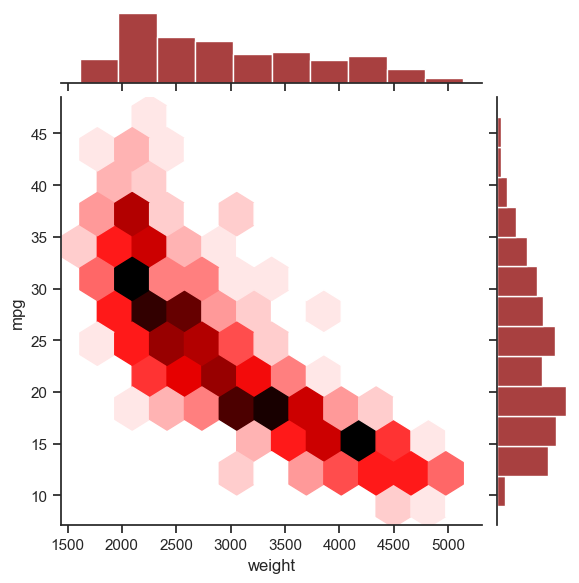

In [4]:
## Generate the hexbin plot
sns.set(style = "ticks")
ax = sns.jointplot(x=mpg_df.weight, y=mpg_df.mpg, kind='hex', color="darkRed")

### Contour plot

Whilst a Hexbin plot looks cool, it is hard to see some of the details in some cases. Thus, we can use a Contour plot. This forms a contour map of our data, like an OS Map. In Seaborn, a contour plot is referred to as a `kdeplot`.

See https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot

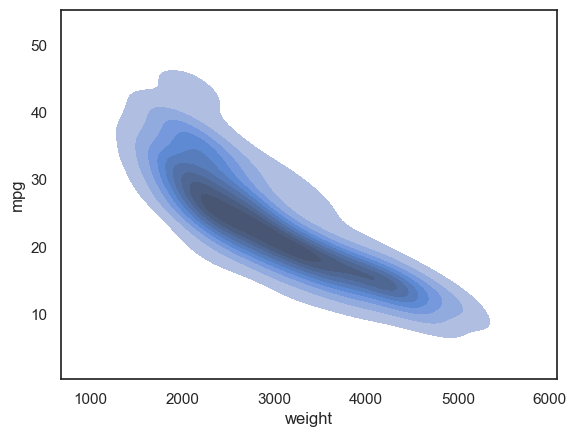

In [5]:
## Generate the contour plot
sns.set(style = "white")
ax = sns.kdeplot(x=mpg_df.weight, y=mpg_df.mpg, fill=True)

### Line plot

Line plots represent information as a series of data points connected by a straight line - we also saw this in Lab 1. They are useful for indicating relationships between discrete numerical features on the x-axis (e.g. Year in Lab 1 and model_year in this data set) and continuous numerical features on the y-axis (e.g. levels of consumption in Lab 1 and mpg for this dataset)

See https://seaborn.pydata.org/generated/seaborn.lineplot.html#

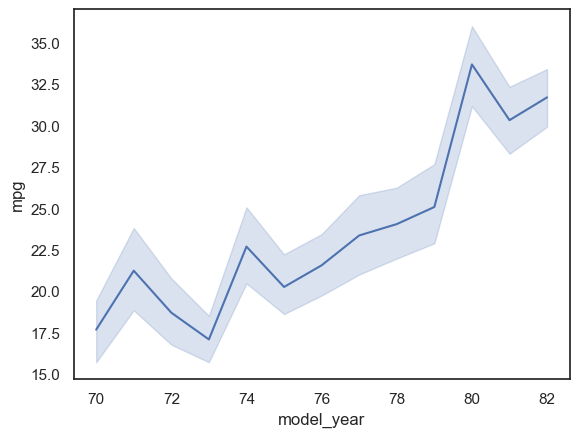

In [11]:
## Generate a line plot with a confidence interval
ax = sns.lineplot(data = mpg_df, x="model_year", y="mpg")

Points connected by the solid line represent the mean mpg. The shaded area around the line shows the confidence interval (by default set to 95% - ie the shaded area represents the range that 95% of the values fall within). We can specify a different confidence interval (referred to as `ci` in Seaborn)

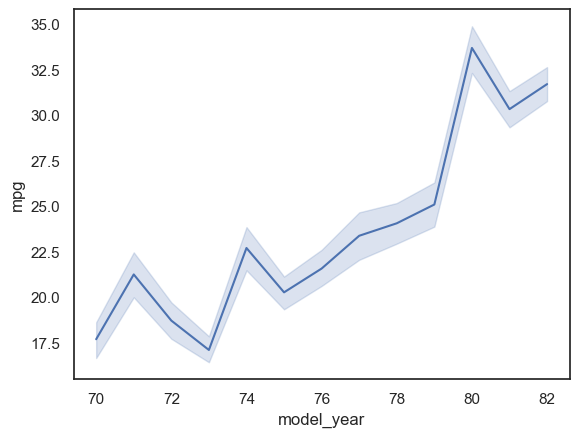

In [12]:
## Generate a line plot with a *modified* confidence interval
ax = sns.lineplot(data = mpg_df, x="model_year", y="mpg", errorbar=('ci', 68))

## We can also generate a line plot with no cofidence interval
## ax = sns.lineplot(data = mpg_df, x="model_year", y="mpg", errorbar=None)

### Histograms

A histogram is a graphical display of data using bars of different heights. It is similar to a barchart, except that it groups values into ranges and the height of each bar shows how many values fall into each range.

Going back to the mpg dataset, we can draw a histogram analyse the spread of vehicle weights in the dataset using the function `displot` (standard distribution plot). By setting `kde=True`, we can include a smoothed curve over the histogram called a kernel density estimation.

See https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

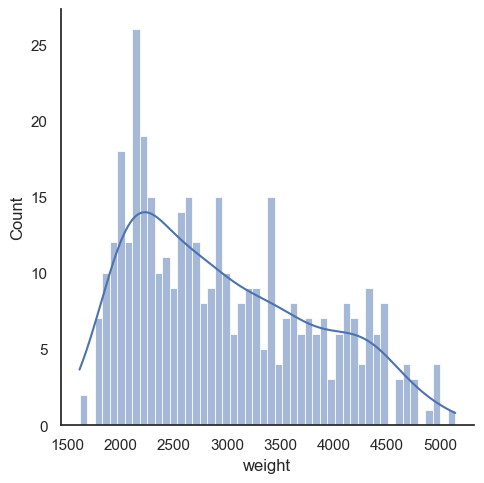

In [20]:
## Generate a histogram plot
ax = sns.displot(mpg_df.weight, bins=50, kde=True)

We can plot some key information onto the graph as well!

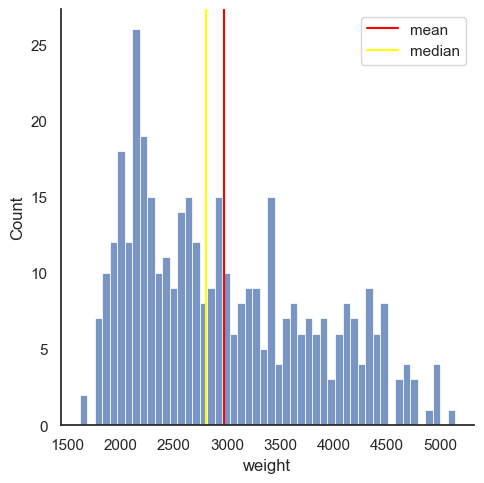

In [21]:
## Generate a histogram plot
ax = sns.displot(mpg_df.weight, bins=50, kde=False)

## We can draw a line representing the mean...
plt.axvline(x=np.mean(mpg_df.weight), color='red', label='mean')

## ...and the median
plt.axvline(x=np.median(mpg_df.weight), color='yellow', label='median')

## Add a legend
plt.legend(loc='upper right')

### Box plots

Box plots represent the summary statistics of a numerical feature (e.g. mpg) in relation to a categorical feature (e.g. model_year). Just like the previous plots, we can use Seaborn's built in plot functions.  See https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

In this plot:
  * The horizontal line inside the box represents the median.
  * The upper boundary marks the 25th quartile.
  * The lower boundary represents the 75th quartile.
  * The T shapes whiskers show the maximum and minimum values that are not considered outliers.
  * Any points outside of the whiskers are considered outliers, and shown by circles.

*A note on outliers*: outliers are values or instances that are significantly different from the rest of the data. These can be genuine or they can be mistakes. Outliers can result in flawed visualisations or flawed insight. As such, there are 3 main ways of dealing with outliers:

  1. Deletion of the anomaly
  2. Replacement of the anomaly - you might replace the value with the mean or median of the data or you might use linear interpolation (especially in time series data). You might use linear or logical regression models to predict the value
  3. Transformation

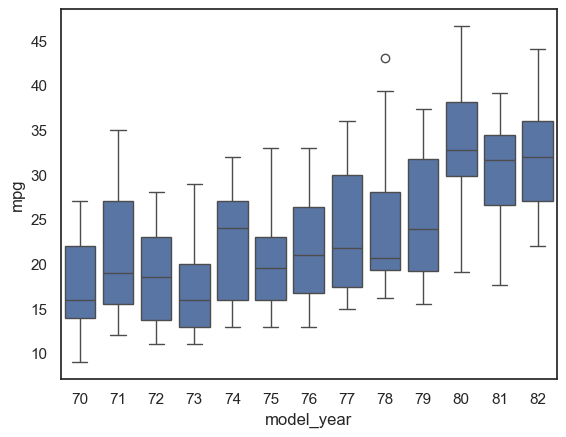

In [13]:
## Generate a box plot
ax = sns.boxplot(data=mpg_df, x="model_year", y="mpg")

We can also group data by decade. First, we modify the dataframe by creating a new feature `'model_decade'` then we draw the box plot replacing `'model_year'` with `'model_decade'`

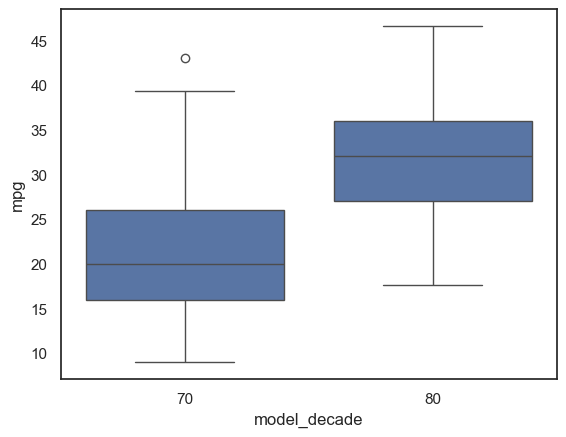

In [14]:
## Group the data into the decades, and set the type
mpg_df['model_decade']=np.floor(mpg_df.model_year/10)*10
mpg_df['model_decade']=mpg_df['model_decade'].astype(int)

## Generate a box plot
ax = sns.boxplot(data=mpg_df, x="model_decade", y="mpg")

We can also add other features such as setting a hue

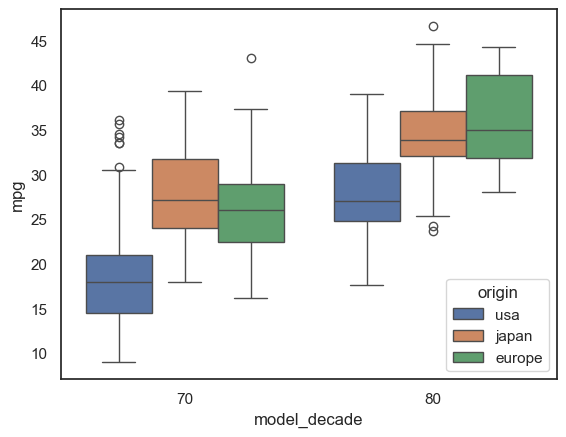

In [15]:
## Generate a box plot with the hue
ax = sns.boxplot(data =mpg_df, x="model_decade", y="mpg", hue='origin')

### Violin Plots

A violin plot is similar to a box plot but contains more information about variations in the data; and its called this because it looks like a violin! The shape of the plot tells you about the shape of the data distribution.  See https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn-violinplot

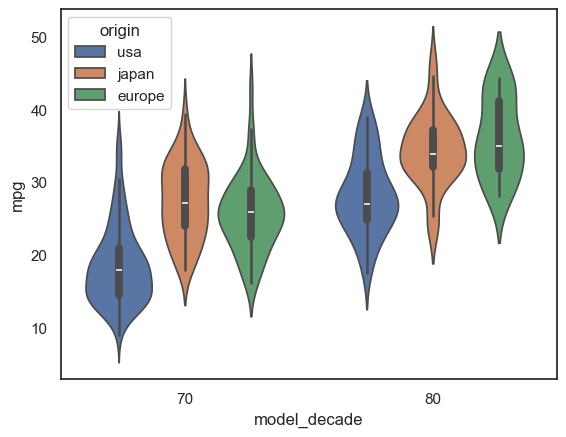

In [16]:
## Generate a violin plot
ax = sns.violinplot(data=mpg_df, x="model_decade", y="mpg", hue='origin')

## Flights Dataset Graphs

Seaborn also has another dataset called flights that gives different information about flights. This one has more continuous data, so we can use it to show different graphs! First, lets load the data...

In [17]:
## Load the flights dataset and have a look at the head
flights_df = sns.load_dataset("flights")
flights_df.head() 

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

### Multi-line plot

We can use the dataset to plot how the number of passengers varies by month in different years. We could do this by drawing multiple line plots in a single figure, combining the techniques from the line plot and the box plot discussed in the MPG dataset.

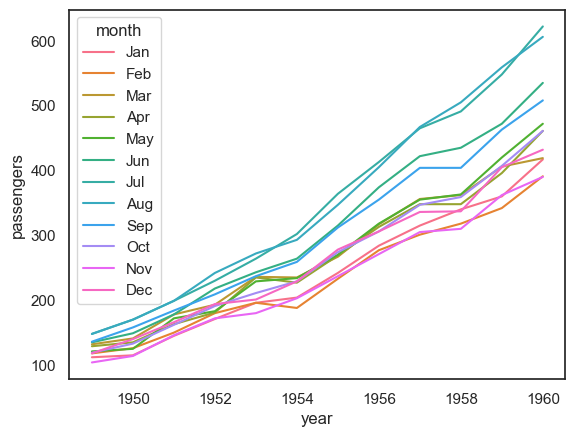

In [18]:
## Generate a multi-line plot
ax = sns.lineplot(data=flights_df, x="year", y = "passengers", hue = "month")

This is not the clearest of visualisations, as the lines overlap and is therefore rather crowded. One thing we could do is try to filter the data e.g. extracting data for July and August only...

    year month  passengers
6   1949   Jul         148
7   1949   Aug         148
18  1950   Jul         170
19  1950   Aug         170
30  1951   Jul         199


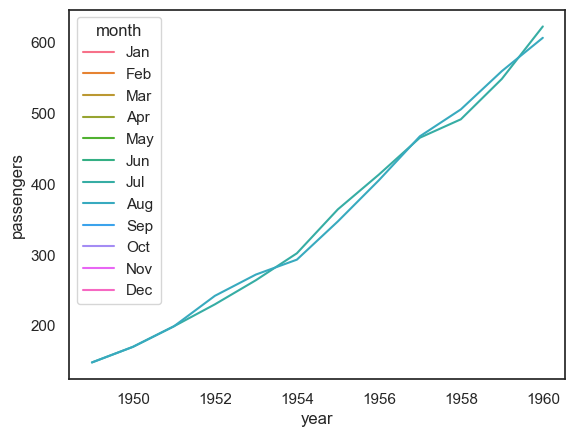

In [19]:
## Limit the data to just a few months
flights_jul_aug = flights_df[(flights_df.month=="Jul") | (flights_df.month=="Aug")]
print(flights_jul_aug.head())

## Generate a multi-line plot
ax = sns.lineplot(data=flights_jul_aug, x="year", y = "passengers", hue = "month")

### Heatmaps

Another option to consider in this case is a heatmap. A heatmap is a visual representation of a continuous numerical feature (passenger numbers) as a function of two other discrete features (in this case year and month). The information is presented in grid form - each cell in the grid represents a combination of the two discrete features and is coloured based on the numerical value of the continuous feature.  See https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

To visualise this, we first need to pivot the dataset.

In [20]:
flights_df

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

In [21]:
## We first need to pivot the dataset

df_pivoted=flights_df.pivot(index='month', columns='year', values='passengers')
df_pivoted.head()

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472

We can then generate the heatmap...

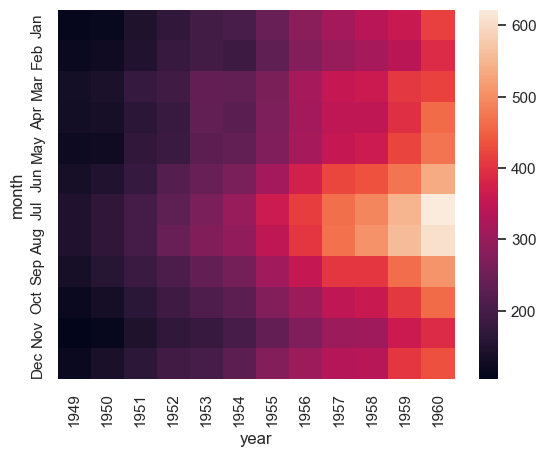

In [22]:
## Generate a heat map
ax = sns.heatmap(df_pivoted)

Looking at the heatmap, we can see that the number of passengers has increased steadily from 1949 to 1960, and that the largest number of passengers fly in July and August.

When datasets are very large it is sometimes useful to present summary statistics.

## Exercises

For these exercises, we'll be using the 120 Years of Olympic History dataset, which is available [here](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv) and available as a csv [here](https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/athlete_events.csv) or from the module lab page. For each of the exercises, you should take the time to refine your visualisations.

### Exercise 1 - Medal winners

Create a plot using an appropriate visualisation technique that presents height and weight features of the 2016 medal winners in athletics swimming, rowing, football and hockey.

In [ ]:
## Exercise 1 code here! ##

### Exercise 2 - Athlete stats

Create a plot using an appropriate visualisation technique that best presents the average age of the athletes for each olympics.

In [ ]:
## Exercise 2 code here! ##

## Exercise 3

As discussed in Lab 1's Exercise 2, and in general in Lab 2, there are plenty of interesting datasets out there! Using a brand new dataset (or using the one from Lab 1 Exercise 2), plot a collection of graphs, with the aim of making them as visually pleasing and clear as possible.

In [ ]:
## Exercise 3 code here! ##